In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import folium
import seaborn as sns

In [2]:
# read the Autounion company free (complimentary transfers for 2022)
df = pd.read_excel(
    r"C:\Users\ioannis.maragkakis\OneDrive - Accenture\Desktop\TEMES-COSTA-NAVARINO\data\4. Autounion  complimentary Transfers details temes 2022.xlsx", 
    sheet_name='working sheet')
df.head()

,Ημερομηνία,Day,Month,Year,Ωρα,Ωρα.1,Διαδρομή,From,From .1,To,To.1,Transfer Type,Σχόλια/Πελάτης,Σχόλια/Πελάτης.1,Εν-Πδ-Νπ / Ημερομηνία,RsvNo/Διαδρομή,Τύπος Αυτοκινήτου,Τύπος Αυτοκινήτου.1,Πληρωμή
0,2022-02-21 07:00:00,21.0,2,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4279,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
1,2022-02-21 07:00:00,21.0,2,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4280,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
2,2022-02-22 07:00:00,22.0,2,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4281,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
3,2022-02-22 07:00:00,22.0,2,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4288,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
4,2022-02-22 17:00:00,22.0,2,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",Costa Navarino Dunes/Westin,Costa Navarino Dunes,Pylos,Pylos,Local Routes,NAVARINO COLLECTIONS PETRINO ΤΕΜΕΣ Α.Ε.,Hotel Guest Transfer,4-0-0,4171,Minivan,Mercedes Vito/Viano/Minivan,50


In [3]:
# change the column names
df.columns = ['date', 'day', 'month', 'year', 'hour', 'am/pm', 'transfer', 'from', 'from1', 'to', 'to1', 'transfer_type', 'comments', 'comments1', 'date_enpdnp', 'rsv_no', 'car_type', 'car_type1', 'payment']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1872 non-null   datetime64[ns]
 1   day            1872 non-null   float64       
 2   month          1873 non-null   int64         
 3   year           1873 non-null   int64         
 4   hour           0 non-null      float64       
 5   am/pm          1873 non-null   object        
 6   transfer       1872 non-null   object        
 7   from           1873 non-null   object        
 8   from1          1873 non-null   object        
 9   to             1873 non-null   object        
 10  to1            1873 non-null   object        
 11  transfer_type  1873 non-null   object        
 12  comments       1872 non-null   object        
 13  comments1      1873 non-null   object        
 14  date_enpdnp    1872 non-null   object        
 15  rsv_no         1872 n

In [5]:
golf_transfers = df.loc[df['transfer_type'] == 'Golf Transfers']
golf_transfers

,date,day,month,year,hour,am/pm,transfer,from,from1,to,to1,transfer_type,comments,comments1,date_enpdnp,rsv_no,car_type,car_type1,payment
0,2022-02-21 07:00:00,21.0,2,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4279,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
1,2022-02-21 07:00:00,21.0,2,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4280,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
2,2022-02-22 07:00:00,22.0,2,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4281,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
3,2022-02-22 07:00:00,22.0,2,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4288,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
5,2022-02-23 07:00:00,23.0,2,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4282,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,2022-11-25 07:00:00,25.0,11,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,12271,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
1849,2022-11-26 07:00:00,26.0,11,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,11930,Bus 50seater,Bus 50seater,485.9
1850,2022-11-26 07:00:00,26.0,11,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,12039,Bus 50seater,Bus 50seater,485.9
1851,2022-11-26 07:00:00,26.0,11,2022,NaN,AM,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,12275,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6


In [6]:
golf_transfers = golf_transfers.drop(index=[256])

In [7]:
golf_transfers['payment'] = golf_transfers['payment'].astype(float)

In [8]:
# check for nans
total_count = len(golf_transfers)
for c in golf_transfers.columns:
    nan_count = golf_transfers[c].isna().sum()
    nan_pct = 100*(nan_count / total_count)
    print(f'The column "{c}" containers {nan_count} NaNs that is {nan_pct:.2f}% of the total')

The column "date" containers 0 NaNs that is 0.00% of the total
The column "day" containers 0 NaNs that is 0.00% of the total
The column "month" containers 0 NaNs that is 0.00% of the total
The column "year" containers 0 NaNs that is 0.00% of the total
The column "hour" containers 1011 NaNs that is 100.00% of the total
The column "am/pm" containers 0 NaNs that is 0.00% of the total
The column "transfer" containers 0 NaNs that is 0.00% of the total
The column "from" containers 0 NaNs that is 0.00% of the total
The column "from1" containers 0 NaNs that is 0.00% of the total
The column "to" containers 0 NaNs that is 0.00% of the total
The column "to1" containers 0 NaNs that is 0.00% of the total
The column "transfer_type" containers 0 NaNs that is 0.00% of the total
The column "comments" containers 0 NaNs that is 0.00% of the total
The column "comments1" containers 0 NaNs that is 0.00% of the total
The column "date_enpdnp" containers 0 NaNs that is 0.00% of the total
The column "rsv_no" co

In [9]:
del golf_transfers['day'], golf_transfers['month'], golf_transfers['year'], golf_transfers['hour'], golf_transfers['am/pm']

In [10]:
golf_transfers.head()

,date,transfer,from,from1,to,to1,transfer_type,comments,comments1,date_enpdnp,rsv_no,car_type,car_type1,payment
0,2022-02-21 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4279,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
1,2022-02-21 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4280,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
2,2022-02-22 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4281,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
3,2022-02-22 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4288,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6
5,2022-02-23 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4282,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6


In [11]:
golf_transfers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1859
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1011 non-null   datetime64[ns]
 1   transfer       1011 non-null   object        
 2   from           1011 non-null   object        
 3   from1          1011 non-null   object        
 4   to             1011 non-null   object        
 5   to1            1011 non-null   object        
 6   transfer_type  1011 non-null   object        
 7   comments       1011 non-null   object        
 8   comments1      1011 non-null   object        
 9   date_enpdnp    1011 non-null   object        
 10  rsv_no         1011 non-null   object        
 11  car_type       1011 non-null   object        
 12  car_type1      1011 non-null   object        
 13  payment        1011 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 118.5+ KB


In [12]:
golf_transfers['month'] = golf_transfers['date'].dt.month
golf_transfers['day'] =  golf_transfers['date'].dt.day
golf_transfers['hour'] = golf_transfers['date'].dt.hour
golf_transfers['minute'] = golf_transfers['date'].dt.minute

In [13]:
golf_transfers.head()

,date,transfer,from,from1,to,to1,transfer_type,comments,comments1,date_enpdnp,rsv_no,car_type,car_type1,payment,month,day,hour,minute
0,2022-02-21 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4279,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,21,7,0
1,2022-02-21 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4280,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,21,7,0
2,2022-02-22 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4281,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,22,7,0
3,2022-02-22 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4288,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,22,7,0
5,2022-02-23 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",The Dunes Club,The Dunes Club,The Bay Course,The Bay Course,Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4282,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,23,7,0


In [14]:
del golf_transfers['from'], golf_transfers['from1'], golf_transfers['to'], golf_transfers['to1']

In [15]:
golf_transfers.head()

,date,transfer,transfer_type,comments,comments1,date_enpdnp,rsv_no,car_type,car_type1,payment,month,day,hour,minute
0,2022-02-21 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4279,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,21,7,0
1,2022-02-21 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4280,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,21,7,0
2,2022-02-22 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4281,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,22,7,0
3,2022-02-22 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4288,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,22,7,0
5,2022-02-23 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",Golf Transfers,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4282,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,23,7,0


In [16]:
del golf_transfers['transfer_type']

In [17]:
golf_transfers.head()

,date,transfer,comments,comments1,date_enpdnp,rsv_no,car_type,car_type1,payment,month,day,hour,minute
0,2022-02-21 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4279,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,21,7,0
1,2022-02-21 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4280,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,21,7,0
2,2022-02-22 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4281,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,22,7,0
3,2022-02-22 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4288,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,22,7,0
5,2022-02-23 07:00:00,"Transfers - Μεταφορά 1. Costa Navarino Dunes, ...",GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,GOLF SHUTTLE ΤΕΜΕΣ Α.Ε.,19-0-0,4282,Mercedes Sprinter 19seater,Mercedes Sprinter 19seater,361.6,2,23,7,0


# total sum of cost per month


In [18]:
cost_per_month = golf_transfers.groupby('month')['payment'].sum().reset_index(drop=False)
cost_per_month

,month,payment
0,2,7684.0
1,3,59066.5
2,4,57519.5
3,5,33497.2
4,6,23142.4
5,7,16995.2
6,8,16633.6
7,9,46646.4
8,10,54109.8
9,11,38616.6


<AxesSubplot:xlabel='month', ylabel='payment'>

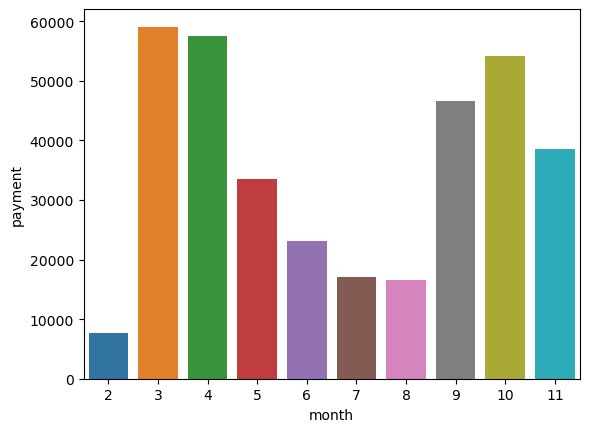

In [19]:
sns.barplot(data=cost_per_month, x='month', y='payment')

# Average payment per route per month

In [20]:
cost_per_month_avg = golf_transfers.groupby('month')['payment'].mean().reset_index(drop=False)
cost_per_month_avg

,month,payment
0,2,384.200000
1,3,371.487421
2,4,357.263975
3,5,345.331959
4,6,361.600000
5,7,361.600000
6,8,361.600000
7,9,361.600000
8,10,322.082143
9,11,321.805000


<AxesSubplot:xlabel='month', ylabel='payment'>

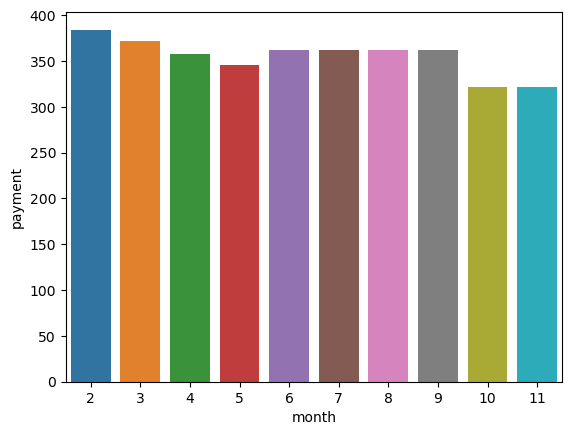

In [21]:
sns.barplot(data=cost_per_month_avg, x='month', y='payment')

# Median payment per route per month

In [22]:
cost_per_month_median = golf_transfers.groupby('month')['payment'].median().reset_index(drop=False)
cost_per_month_median

,month,payment
0,2,361.6
1,3,361.6
2,4,361.6
3,5,361.6
4,6,361.6
5,7,361.6
6,8,361.6
7,9,361.6
8,10,361.6
9,11,361.6


<AxesSubplot:xlabel='month', ylabel='payment'>

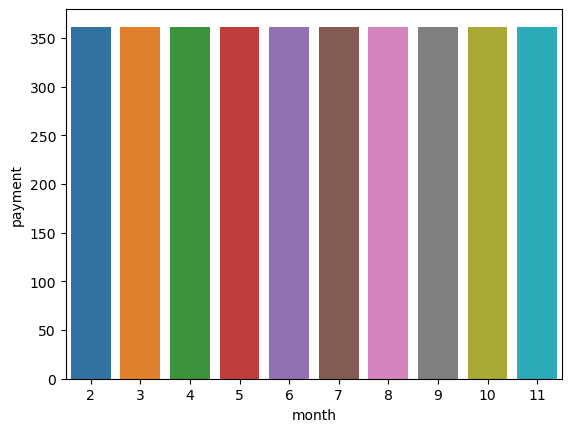

In [23]:
sns.barplot(data=cost_per_month_median, x='month', y='payment')

# total number of routes per month

In [24]:
number_of_routes_per_month = golf_transfers.groupby('month')['payment'].count().reset_index()
number_of_routes_per_month = number_of_routes_per_month.rename(columns={'payment': 'total routes'})
number_of_routes_per_month

,month,total routes
0,2,20
1,3,159
2,4,161
3,5,97
4,6,64
5,7,47
6,8,46
7,9,129
8,10,168
9,11,120


<AxesSubplot:xlabel='month', ylabel='total routes'>

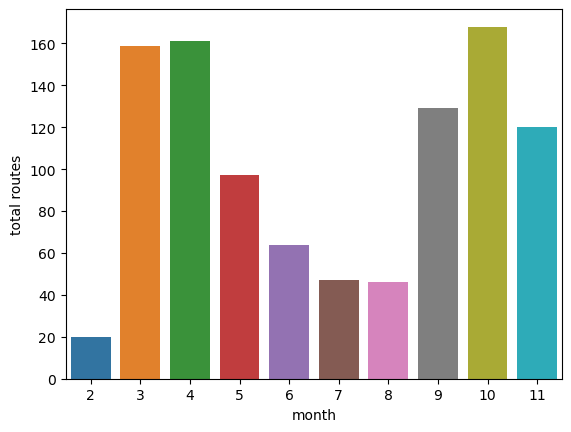

In [25]:
sns.barplot(data=number_of_routes_per_month, x='month', y='total routes')

In [80]:
shuttles_hills = pd.read_excel(
    r"C:\Users\ioannis.maragkakis\OneDrive - Accenture\Desktop\TEMES-COSTA-NAVARINO\data\Golf_Shuttles.xlsx",
    sheet_name = 'Hills'
)
shuttles_hills = shuttles_hills.set_index('Hour')
shuttles_hills

,2023-09-01,2023-09-02,2023-09-03,2023-09-04,2023-09-05,2023-09-06,2023-09-07,2023-09-08,2023-09-09,2023-09-10,...,2023-11-16,2023-11-17,2023-11-18,2023-11-19,2023-11-20,2023-11-21,2023-11-22,2023-11-23,2023-11-24,2023-11-25
Hour,,,,,,,,,,,,,,,,,,,,,
6:00-6:20,0,0,0,0,0,0,0,0,3,0,...,0,2,0,0,0,0,0,0,0,4
6:20-6:40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
6:40-7:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7:00-7:20,0,0,0,0,0,0,5,0,0,0,...,0,0,0,2,1,0,0,0,0,0
7:20-7:40,4,3,6,2,0,6,5,7,1,4,...,0,6,0,0,15,0,0,0,0,0
7:40-8:00,2,0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8:00-8:20,0,7,0,0,2,5,3,8,6,3,...,1,20,0,0,0,0,0,3,7,8
8:20-8:40,0,2,8,4,3,9,7,0,9,8,...,16,21,14,0,0,0,0,0,7,8
8:40-9:00,0,2,0,0,0,0,0,0,0,0,...,18,0,8,0,0,0,50,0,0,6


In [85]:
shuttles_hills.columns = [pd.to_datetime(str(c).replace('2023', '2022')) for c in shuttles_hills.columns]

In [86]:
shuttles_hills.columns

DatetimeIndex(['2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04',
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12',
               '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
               '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20',
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02',
               '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06',
               '2022-10-07', '2022-10-08', '2022-10-09', '2022-10-10',
               '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14',
               '2022-10-15', '2022-10-16', '2022-10-17', '2022-10-18',
               '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22',
               '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26',
      

In [91]:
shuttles_hills

,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,...,2022-11-16,2022-11-17,2022-11-18,2022-11-19,2022-11-20,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25
Hour,,,,,,,,,,,,,,,,,,,,,
6:00-6:20,0,0,0,0,0,0,0,0,3,0,...,0,2,0,0,0,0,0,0,0,4
6:20-6:40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
6:40-7:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7:00-7:20,0,0,0,0,0,0,5,0,0,0,...,0,0,0,2,1,0,0,0,0,0
7:20-7:40,4,3,6,2,0,6,5,7,1,4,...,0,6,0,0,15,0,0,0,0,0
7:40-8:00,2,0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8:00-8:20,0,7,0,0,2,5,3,8,6,3,...,1,20,0,0,0,0,0,3,7,8
8:20-8:40,0,2,8,4,3,9,7,0,9,8,...,16,21,14,0,0,0,0,0,7,8
8:40-9:00,0,2,0,0,0,0,0,0,0,0,...,18,0,8,0,0,0,50,0,0,6


In [98]:
shuttles_hills_stacked = shuttles_hills.stack().reset_index()
shuttles_hills_stacked = shuttles_hills_stacked.rename(columns={'level_1': 'date', 0: 'number_of_people'})
shuttles_hills_stacked

,Hour,date,number_of_people
0,6:00-6:20,2022-09-01,0
1,6:00-6:20,2022-09-02,0
2,6:00-6:20,2022-09-03,0
3,6:00-6:20,2022-09-04,0
4,6:00-6:20,2022-09-05,0
...,...,...,...
2661,16:30-17:00,2022-11-21,0
2662,16:30-17:00,2022-11-22,0
2663,16:30-17:00,2022-11-23,0
2664,16:30-17:00,2022-11-24,0


In [99]:
# sum of people in every hour for all days
group_by_hour = shuttles_hills_stacked.groupby('Hour')['number_of_people'].sum()
group_by_hour

Hour
10:00-10:20     829
10:20-10:40     614
10:40-11:00     451
11:00-11:20     341
11:20-11:40     334
11:40-12:00     181
12:00-12:20     203
12:20-12:40      94
12:40-13:00      38
13:00-13:20      99
13:20-13:40      95
13:40-14:00      39
14:00-14:20      29
14:20-14:40      57
14:40-15:00      51
15:00-15:30      57
15:30-16:00      16
16:00-16:30       0
16:30-17:00       1
6:00-6:20        79
6:20-6:40        46
6:40-7:00        24
7:00-7:20        66
7:20-7:40       361
7:40-8:00       624
8:00-8:20       996
8:20-8:40      1028
8:40-9:00       956
9:00-9:20      1046
9:20-9:40       850
9:40-10:00      719
Name: number_of_people, dtype: int64

In [104]:
px.bar(data_frame=group_by_hour, title='total number of people per hour')

In [100]:
# avg number of people by hour
avg_people_by_hour = shuttles_hills_stacked.groupby('Hour')['number_of_people'].mean()
avg_people_by_hour

Hour
10:00-10:20     9.639535
10:20-10:40     7.139535
10:40-11:00     5.244186
11:00-11:20     3.965116
11:20-11:40     3.883721
11:40-12:00     2.104651
12:00-12:20     2.360465
12:20-12:40     1.093023
12:40-13:00     0.441860
13:00-13:20     1.151163
13:20-13:40     1.104651
13:40-14:00     0.453488
14:00-14:20     0.337209
14:20-14:40     0.662791
14:40-15:00     0.593023
15:00-15:30     0.662791
15:30-16:00     0.186047
16:00-16:30     0.000000
16:30-17:00     0.011628
6:00-6:20       0.918605
6:20-6:40       0.534884
6:40-7:00       0.279070
7:00-7:20       0.767442
7:20-7:40       4.197674
7:40-8:00       7.255814
8:00-8:20      11.581395
8:20-8:40      11.953488
8:40-9:00      11.116279
9:00-9:20      12.162791
9:20-9:40       9.883721
9:40-10:00      8.360465
Name: number_of_people, dtype: float64

In [103]:
px.bar(data_frame=avg_people_by_hour, title='average number of people per hour')

In [114]:
shuttles_hills_stacked['month'] = shuttles_hills_stacked['date'].dt.month_name()
shuttles_hills_stacked

,Hour,date,number_of_people,month
0,6:00-6:20,2022-09-01,0,September
1,6:00-6:20,2022-09-02,0,September
2,6:00-6:20,2022-09-03,0,September
3,6:00-6:20,2022-09-04,0,September
4,6:00-6:20,2022-09-05,0,September
...,...,...,...,...
2661,16:30-17:00,2022-11-21,0,November
2662,16:30-17:00,2022-11-22,0,November
2663,16:30-17:00,2022-11-23,0,November
2664,16:30-17:00,2022-11-24,0,November


In [130]:
group_by_month = shuttles_hills_stacked.groupby(['month', 'Hour']).mean().reset_index()
group_by_month['Hour'] = [row if len(row) == 11 else '0'+row for row in group_by_month['Hour']]
group_by_month = group_by_month.sort_values(by=['month', 'Hour'])
group_by_month['number_of_people'] = group_by_month['number_of_people'].astype(int)
group_by_month.head(30)

,month,Hour,number_of_people
19,November,06:00-6:20,0
20,November,06:20-6:40,0
21,November,06:40-7:00,0
22,November,07:00-7:20,0
23,November,07:20-7:40,2
24,November,07:40-8:00,6
25,November,08:00-8:20,9
26,November,08:20-8:40,12
27,November,08:40-9:00,12
28,November,09:00-9:20,11


In [133]:
group_by_month.loc[group_by_month.month == 'October']

,month,Hour,number_of_people
50,October,06:00-6:20,1
51,October,06:20-6:40,0
52,October,06:40-7:00,0
53,October,07:00-7:20,1
54,October,07:20-7:40,4
55,October,07:40-8:00,10
56,October,08:00-8:20,16
57,October,08:20-8:40,14
58,October,08:40-9:00,14
59,October,09:00-9:20,14


In [131]:
px.bar(group_by_month, x="month", y="number_of_people",
             color='Hour', barmode='group',
             height=400)